In [0]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels),(test_data, test_labels) =imdb.load_data(num_words =10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(25000,)

In [6]:
test_data.shape

(25000,)

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
max([max(sequence) for sequence in test_data])

9999

# we need to convert our integer into integer tensors

In [0]:
def vector_sequence(sequences, dimension =10000):
  results =np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1.
  return results
x_test =vector_sequence(test_data)
x_train =vector_sequence(train_data)


In [0]:
#y_train =np.asarray(train_labels).astype('float32')
y_train = np.asarray(train_labels).astype('float32')
y_test =np.asarray(test_labels).astype('float32')

In [36]:
y_train[0]

1.0

In [40]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

# we need to build our model here

In [0]:
model_1 =models.Sequential()
model_1.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dense(32, activation='relu'))
model_1.add(layers.Dense(32, activation='relu'))
model_1.add(layers.Dense(1, activation='softmax'))

# compile our network

In [0]:
model_1.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'])

In [0]:
x_val =x_train[:10000]
y_val =y_train[:10000]
part_x_train =x_train[10000:]
part_y_train =y_train[10000:]



In [0]:
model_1.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'])

In [50]:
network_1 =model_1.fit(part_x_train, part_y_train, batch_size=512, epochs=20, validation_data =(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 137us/step - loss: 7.7208 - accuracy: 0.4965 - val_loss: 7.5438 - val_accuracy: 0.5053
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 7.7208 - accuracy: 0.4965 - val_loss: 7.5438 - val_accuracy: 0.5053
Epoch 3/20
15000/15000 [==============================] - 2s 135us/step - loss: 7.7208 - accuracy: 0.4965 - val_loss: 7.5438 - val_accuracy: 0.5053
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 7.7208 - accuracy: 0.4965 - val_loss: 7.5438 - val_accuracy: 0.5053
Epoch 5/20
15000/15000 [==============================] - 2s 135us/step - loss: 7.7208 - accuracy: 0.4965 - val_loss: 7.5438 - val_accuracy: 0.5053
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 7.7208 - accuracy: 0.4965 - val_loss: 7.5438 - val_accuracy: 0.5053
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [0]:
history_dic=network_1.history

In [53]:
history_dic.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
loss =history_dic['val_loss']
val_loss_values =history_dic['val_loss']

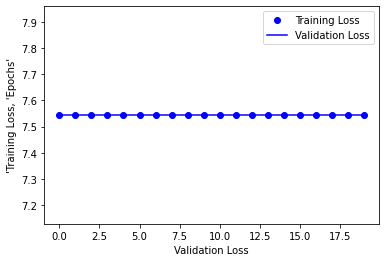

In [63]:
plt.plot(loss,'bo', label ='Training Loss')
plt.plot(val_loss_values, 'b', label='Validation Loss')
plt.xlabel('Validation Loss')
plt.ylabel("'Training Loss, 'Epochs'")
plt.legend()

In [0]:
model_2=models.Sequential()
model_2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model_2.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
network_2 =model_2.fit(part_x_train, part_y_train, epochs =50, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/50
15000/15000 [==============================] - 3s 184us/step - loss: 0.1313 - accuracy: 0.9581 - val_loss: 0.2819 - val_accuracy: 0.8875
Epoch 2/50
15000/15000 [==============================] - 3s 176us/step - loss: 0.1066 - accuracy: 0.9688 - val_loss: 0.3019 - val_accuracy: 0.8842
Epoch 3/50
15000/15000 [==============================] - 3s 176us/step - loss: 0.0923 - accuracy: 0.9735 - val_loss: 0.3238 - val_accuracy: 0.8799
Epoch 4/50
15000/15000 [==============================] - 3s 181us/step - loss: 0.0726 - accuracy: 0.9820 - val_loss: 0.3293 - val_accuracy: 0.8830
Epoch 5/50
15000/15000 [==============================] - 3s 177us/step - loss: 0.0621 - accuracy: 0.9839 - val_loss: 0.3499 - val_accuracy: 0.8814
Epoch 6/50
15000/15000 [==============================] - 3s 176us/step - loss: 0.0483 - accuracy: 0.9893 - val_loss: 0.3795 - val_accuracy: 0.8759
Epoch 7/50
15000/15000 [==============================] - 3s 1

In [71]:
network_2_dict =network_2.history
network_2_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
loss_Values =network_2_dict['loss']
val_loss_Values =network_2_dict['val_loss']


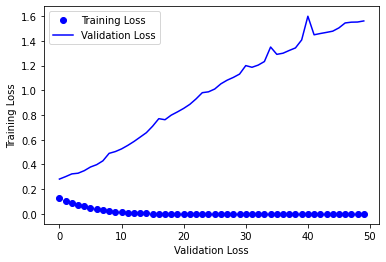

In [76]:
plt.plot(loss_Values, 'bo', label ='Training Loss')
plt.plot(val_loss_Values, 'b', label='Validation Loss')
plt.xlabel('Validation Loss')
plt.ylabel('Training Loss')
plt.legend()

In [0]:
val_acc =network_2_dict['val_accuracy']
training_acc =network_2_dict['accuracy']


Text(0, 0.5, 'Training Accuracy')

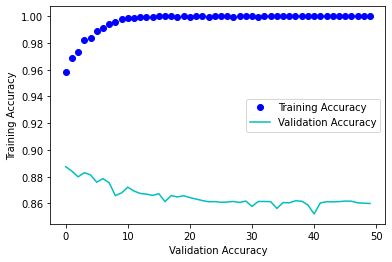

In [90]:
plt.plot(training_acc, 'bo', label='Training Accuracy')
plt.plot(val_acc, 'c', label='Validation Accuracy')
plt.legend()
plt.xlabel('Validation Accuracy')
plt.ylabel('Training Accuracy')


In [102]:
#y_predict =predict.network_2(x_test)
my_evaluate_1 =model_1.evaluate(part_x_train, part_y_train)

15000/15000 [==============================] - 1s 68us/step


In [103]:
my_evaluate_1

[7.678499983978272, 0.49646666646003723]

In [104]:
my_evaluate_2 =model_2.evaluate(part_x_train, part_y_train)

15000/15000 [==============================] - 1s 73us/step


In [105]:
my_evaluate_2

[4.836471820188611e-07, 1.0]

In [0]:
y_pred_1 =model_1.predict(x_test)

In [111]:
y_pred_1

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [0]:
y_predi_2 =model_2.predict(x_test)

In [113]:
y_predi_2

array([[2.3523070e-07],
       [1.0000000e+00],
       [9.9999452e-01],
       ...,
       [9.0933094e-07],
       [2.7337670e-04],
       [9.8804832e-01]], dtype=float32)